# Itchy Boots Analysis

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Veriyi yükleme

In [69]:
data = pd.read_csv('datasets/itchy_boots_ready.csv')

In [70]:
data.head()

,Unnamed: 0.1,Unnamed: 0,season_no,season_title,uploading_date,rate,time,E,title
0,0,0,7,Return to Africa,0,1237258,20,-1,ITCHY BOOTS New Season: this is where I am go...
1,1,1,7,Return to Africa,0,1548717,19,2,I need their help.
2,2,2,7,Return to Africa,0,905116,25,3,No motorcyclists have gone here before
3,3,3,7,Return to Africa,0,790900,18,4,How I ended up in a Berber village in Morocco
4,4,4,7,Return to Africa,0,648198,18,5,Motorcycling solo into the Sahara Desert of Mo...


In [71]:
data = data.iloc[:,1:]

# 2. EDA

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      471 non-null    int64 
 1   season_no       471 non-null    int64 
 2   season_title    471 non-null    object
 3   uploading_date  471 non-null    int64 
 4   rate            471 non-null    int64 
 5   time            471 non-null    int64 
 6   E               471 non-null    int64 
 7   title           471 non-null    object
dtypes: int64(6), object(2)
memory usage: 29.6+ KB


In [73]:
data.isnull().sum()

Unnamed: 0        0
season_no         0
season_title      0
uploading_date    0
rate              0
time              0
E                 0
title             0
dtype: int64

In [74]:
# Burada sadece time ve rate değişkenleri anlamlı. Sezon ve bölüm sayılarının ortalamasından çok anlamlı bir şey beklemiyorum.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,471.0,235.000000,136.110249,0.0,117.5,235.0,352.5,470.0
season_no,471.0,3.825902,2.187841,0.0,2.0,5.0,6.0,7.0
uploading_date,471.0,2.084926,1.326171,0.0,1.0,2.0,3.0,4.0
rate,471.0,595759.838641,514878.502849,167728.0,328092.0,446148.0,659515.5,5916220.0
time,471.0,17.815287,6.454906,1.0,14.0,19.0,22.0,37.0
E,471.0,38.732484,27.707296,-1.0,15.0,35.0,61.0,100.0


In [75]:
# Hangi sezonda ne kadar bölüm olduğu bilgisi
data.season_title.value_counts()

season_title
Project Alaska                                       100
India to Europe                                      100
Southern Africa                                       96
Patagonia to Alaska                                   77
Return to Africa                                      46
Denmark, Iceland, Norway & Sweden                     34
The Dutch Moto Scene                                  11
['Adventure Intermezzo: Tour of The Netherlands']      7
Name: count, dtype: int64

In [76]:
# 0 sezonu aslında küçük bir ara sezon ve 0 da değil. 
data.season_no.value_counts()

season_no
6    100
1    100
5     96
2     77
7     46
3     34
4     11
0      7
Name: count, dtype: int64

In [77]:
# Değerlerde anlamsız sonuçlar var mı?
data.uploading_date.value_counts()

uploading_date
1    142
4    100
2     94
3     84
0     51
Name: count, dtype: int64

In [78]:
# Her bir videonun rating'i sayısal ve devamlı olduğu için min ve max 
data.rate.min(), data.rate.max()

(167728, 5916220)

In [79]:
data.time.min(), data.time.max()

(1, 37)

# 3. Korelasyonlar

In [80]:
data.rate.corr(data.uploading_date)

-0.2490153041400886

In [81]:
data.E

0      -1
1       2
2       3
3       4
4       5
       ..
466    94
467    95
468    96
469    97
470    98
Name: E, Length: 471, dtype: int64

In [82]:
# data.E.corr(data.uploading_date)

In [83]:
data.E.corr(data.rate)

0.07290673054319484

In [84]:
data.season_no.corr(data.rate)

0.26883760002101653

In [85]:
# Sezonlara göre video süresi arasında pozitif bir ilişki var.
data.season_no.corr(data.time)

0.6996406843794095

In [86]:
# Süre ile izlenme oranında çok zayıf bir ilişki var.
data.rate.corr(data.time)

0.28771630384962815

# 4. Plottings

In [87]:
import matplotlib.pyplot as plt

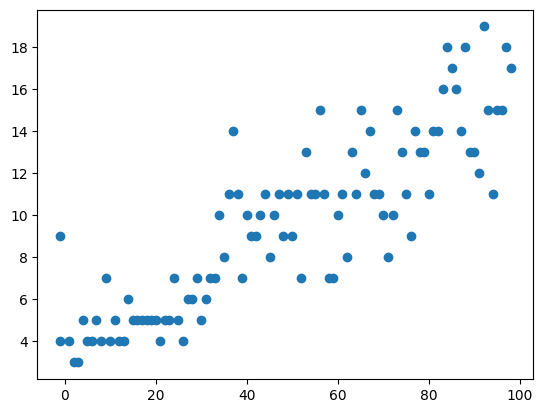

In [88]:
# İlk sezonda süreler artırmaya başlanmış.
plt.scatter(data.E[data.season_no==1], data.time[data.season_no==1])

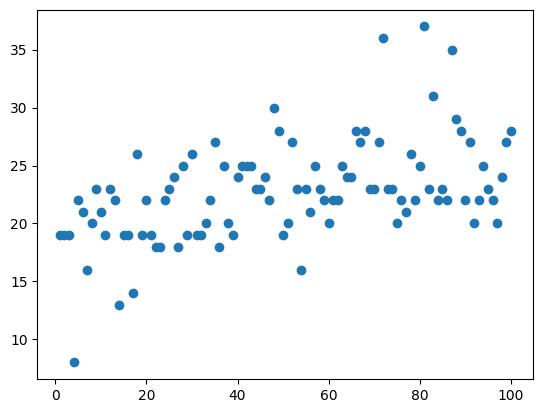

In [89]:
# Son sezonlarda artık belirli bir sürede karar kılmış
plt.scatter(data.E[data.season_no==6], data.time[data.season_no==6])

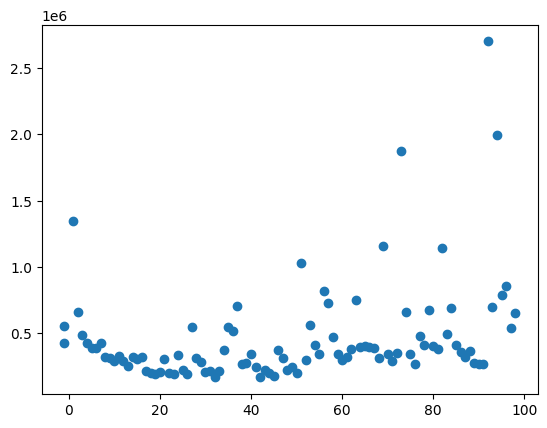

In [90]:
plt.scatter(data.E[data.season_no==1], data.rate[data.season_no==1])

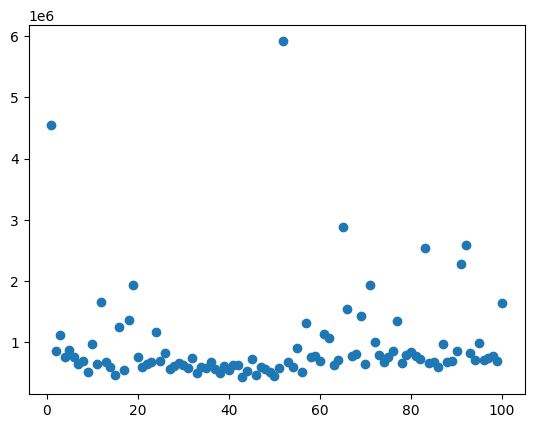

In [91]:
plt.scatter(data.E[data.season_no==6], data.rate[data.season_no==6])

In [92]:
data.groupby('season_no')['rate'].mean()

season_no
0    738750.714286
1    467126.400000
2    389629.571429
3    497204.500000
4    680183.909091
5    507467.770833
6    943453.660000
7    679744.869565
Name: rate, dtype: float64

In [93]:
data.groupby('season_no')['rate'].min()

season_no
0    261980
1    167728
2    234000
3    225440
4    224785
5    231997
6    414735
7    349501
Name: rate, dtype: int64

In [94]:
data.groupby('season_no')['rate'].max()

season_no
0    2379922
1    2699812
2    1277723
3    1774089
4    2213044
5    2376833
6    5916220
7    1548717
Name: rate, dtype: int64

# 5. En çok ve en az izlenenler

In [95]:
data[data.rate > 2000000].sort_values(by='rate', ascending=False)

,Unnamed: 0,season_no,season_title,uploading_date,rate,time,E,title
97,97,6,Project Alaska,1,5916220,27,52,They try to trap me in Honduras 🇭🇳 DANGEROUS!
46,46,6,Project Alaska,1,4547879,19,1,I bought a new motorcycle for more Itchy Boots...
110,110,6,Project Alaska,1,2885049,24,65,Guatemalan POLICE escorts Dutch biker and her ...
464,464,1,India to Europe,4,2699812,19,92,CROSSING INTO RUSSIA
137,137,6,Project Alaska,1,2581185,20,92,Motorcycling Mexico's most dangerous state : C...
128,128,6,Project Alaska,1,2529213,31,83,“People with guns are blocking the road”. MEXI...
292,292,0,['Adventure Intermezzo: Tour of The Netherlands'],3,2379922,11,6,I bought a new motorcycle!
204,204,5,Southern Africa,1,2376833,21,59,How a Himba tribe reacts when they meet me
136,136,6,Project Alaska,1,2267228,27,91,Area 51 in Mexico: the ZONE of SILENCE 🇲🇽
244,244,4,The Dutch Moto Scene,2,2213044,28,3,A dream come true...


In [96]:
# Kabaca bir bakışla yeni alınan motor, sınır geçişleri ve sorunlar daha fazla izleniyor gibi.
# Bir de az izlenenlere bakalım
# Burada sentiment analizi yapılabilir. İlerisi için düşünmeli!

In [97]:
data[data.rate < 300000].sort_values(by='rate')

,Unnamed: 0,season_no,season_title,uploading_date,rate,time,E,title
413,413,1,India to Europe,4,167728,9,42,OFFROADING OMAN - Part 2
402,402,1,India to Europe,4,173860,7,32,TYRE FINISHED?
416,416,1,India to Europe,4,175624,8,45,THE LONG WAY DOWN - in Oman
396,396,1,India to Europe,4,195225,4,26,THE BEST OF CENTRAL THAILAND
393,393,1,India to Europe,4,197595,5,23,ELEPHANTS on the road in Thailand
...,...,...,...,...,...,...,...,...
310,310,2,Patagonia to Alaska,3,298213,17,16,A walk through JURASSIC times - Bosques Petri...
207,207,5,Southern Africa,1,298398,17,62,This ELEPHANT is going to CHARGE! 🐘
317,317,2,Patagonia to Alaska,3,299232,20,23,"Spending a day with locals in Porvenir, Chile"
424,424,1,India to Europe,4,299259,7,52,ABU DHABI & DUBAI


# 6. Sezonlar ve bölüm sayıları

In [98]:
labels = data.season_no.value_counts().keys()
labels.sort_values()

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='season_no')

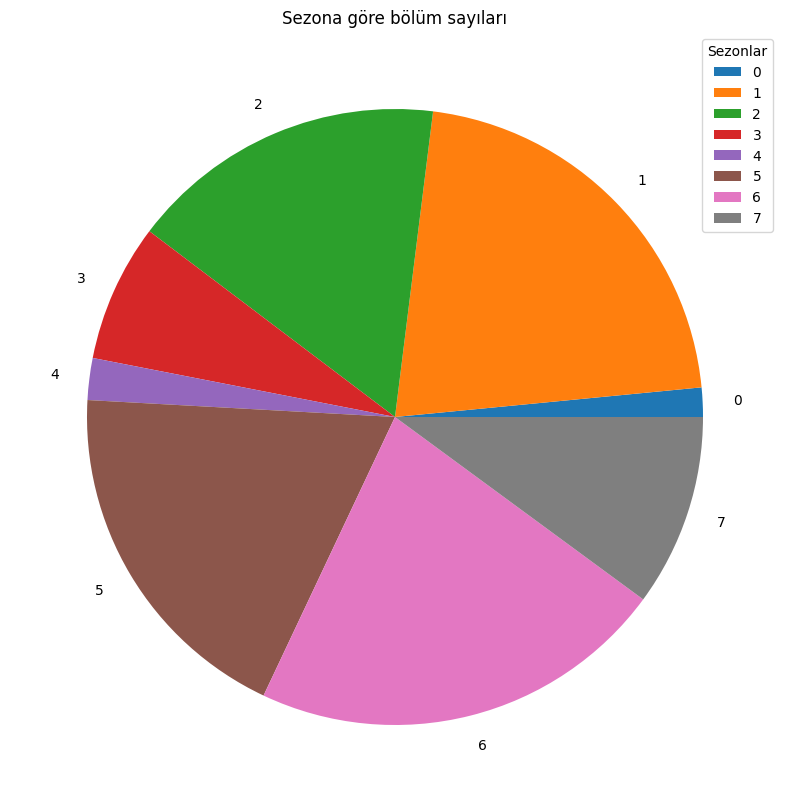

In [99]:
# Sezon ve bölümler
plt.figure(figsize=(10,10))
plt.title('Sezona göre bölüm sayıları')
plt.pie(data.groupby('season_no')['E'].max(), labels=labels.sort_values())
plt.legend(title='Sezonlar')
plt.savefig('images/seasons.png');